# I. Perkenalan
> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 batch 008 Data Science. Pada Graded Challenge ini, saya akan melakukan preprocessing dataset sebelum melakukan proses modeling (split data, normalisasi, encoding, dll), mengimplementasikan Linear Regression dan menentukan hyperparameter yang tepat dengan Scikit-Learn, mencoba model yang telah dibuat dengan data baru, menganalisa informasi dari model yang telah dibuat, dan menarik informasi/kesimpulan dari keseluruhan kegiatan yang dilakukan

# II. Import Libraries
> Cell pertama pada notebook akan diisi semua library yang digunakan dalam project.

In [81]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# III. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Berikut dataset rideshare_kaggle yang diberikan akan di-load. 
Data yang digunakan adalah data penggunaan uber dan lyft untuk area Boston yang berisi: </br>

1. hour	
2. day	
3. month	
4. source	
5. destination	
6. name	distance	
7. surge_multiplier	
8. short_summary	
9. Weather </br>

Data tersebut dapat diunduh pada : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

In [82]:
# Import Data

data = pd.read_csv('rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Berikut kolom icon akan direname menjadi weather agar lebih nyambung dengan data yang dimiliki.

In [83]:
# Check Dataset
data.rename(columns={'icon': 'weather'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berikut akan ditampilkan sumarisasi statistik deskriptif dari data yang telah di-load.

In [84]:
# Check Dataset

data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## Data Cleaning

Pada proses data cleaning, dataset akan diperiksa apabila memiliki missing values.

In [85]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Diketahui bahwa nilai price memilki missing values. Dikarenakan missing values pada price muncul apabila sebaris dengan 'Taxi' pada kolom 'name', maka akan dibuat dataframe copy dimana row yang memiliki 'Taxi' akan dihapus.

In [86]:
data_v2 = data[data['name'] != 'Taxi'].copy()
data_v2

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


# IV. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Berikut akan menampilkan korelasi data.

In [87]:
data_v2.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,...,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,...,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,...,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,...,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,...,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,...,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,...,-0.047307,0.171976,-0.114437,0.169740,-0.109271,0.175336,-0.096327,0.171069,-0.082894,0.173359
longitude,-0.136716,-0.005986,0.078539,-0.126763,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.012402,...,0.030330,-0.136620,0.048836,-0.140275,-0.007029,-0.136949,0.010131,-0.140399,-0.022605,-0.135525
temperature,-0.249027,0.218829,-0.083934,-0.082048,-0.000084,-0.002738,-0.001594,-0.098909,0.012402,1.000000,...,0.333160,-0.254755,0.789220,-0.242993,0.780426,-0.254172,0.817443,-0.231811,0.703078,-0.255578


Berikut merupakan grouping data dengan cab type, agar dapat dilihat bahwa cab type yang memiliki total price tertinggi adalah cab type Lyft.

In [88]:
data_v2.groupby("cab_type", sort=False)["price"].sum()

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

Berikut akan menampilkan histogram pada kolom price, dan scatterplot dimana value x = price dan y = distance.

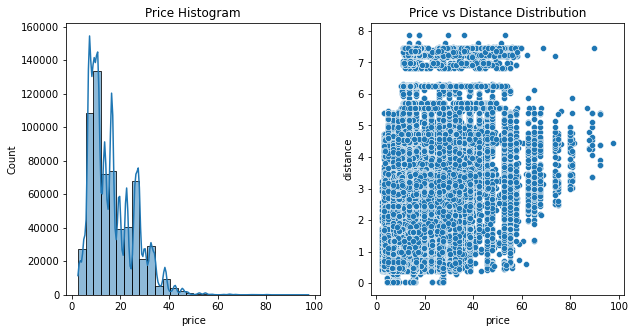

In [89]:
# Histogram

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Histogram')

plt.subplot(1, 2, 2)
sns.scatterplot(x='price', y='distance', data=data_v2)
plt.title('Price vs Distance Distribution')

plt.show()

# V. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## V.I. Get Data Inference

Berikut akan diambil 10 sampel dengan random state sebanyak 17.

In [90]:
# Get Data for Model Inference

data_inf = data_v2.sample(10, random_state=17)
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
150284,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
99887,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
58493,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
419011,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
484995,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
660187,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
239609,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
154837,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
683350,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
49385,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


Berikut Inference-set akan dipisah dari dataset.

In [91]:
# Remove Inference-Set from Dataset

data_train_test = data_v2.drop(data_inf.index)
data_train_test

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Agar tidak ada masalah dengan index-nya, maka akan di-reset untuk inf. & train_test.

In [92]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Display data_inf
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
1,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
2,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
3,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
4,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
5,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
6,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
7,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
8,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
9,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


## V.II. Split Dataset

In [93]:
data_train_test

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637961,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637962,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637963,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637964,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Berikut X & y akan didefinisikan, dimana y merupakan data dari kolom 'price' dan sisanya pada X.

In [94]:
# Define `X` and `y`

X = data_train_test.drop(['price'], axis=1)
y = data_train_test['price']
X

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637961,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637962,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637963,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637964,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [95]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
637961     9.5
637962    13.0
637963     9.5
637964    27.0
637965    10.0
Name: price, Length: 637966, dtype: float64

Berikut merupakan semua judul kolom pada data-set.

In [96]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'weather',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTempe

Berikut dataset akan di-split menjadi X_train, X_test, y_train, y_test dengan menggunakan sklearn.

In [97]:
# Splitting Dataset
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

print(X_train.shape)
print(X_test.shape)

(510372, 56)
(127594, 56)


In [98]:
X_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
206355,b155d610-3951-41b6-8bff-87d97c49551b,1.543440e+09,21,28,11,2018-11-28 21:20:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
369935,1a527f56-8fd3-4426-8df0-2979fb2ae358,1.544990e+09,19,16,12,2018-12-16 19:50:13,America/New_York,Theatre District,Haymarket Square,Uber,...,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
340205,763a29b7-bfdf-4787-9fc5-f86f5002db5e,1.543726e+09,4,2,12,2018-12-02 04:48:02,America/New_York,North Station,Haymarket Square,Uber,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
239193,954d7dad-b594-4df9-bf41-9311e62f2279,1.543406e+09,11,28,11,2018-11-28 11:51:23,America/New_York,Theatre District,Northeastern University,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
467144,0a3b6eac-0fc7-4ed2-aa17-c6835312f6cd,1.543416e+09,14,28,11,2018-11-28 14:35:08,America/New_York,North End,Back Bay,Uber,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516374,1a303ff4-5f37-482d-892f-2d807070b1f1,1.544846e+09,4,15,12,2018-12-15 04:00:04,America/New_York,West End,Haymarket Square,Lyft,...,0.0000,1544806800,26.93,1544788800,46.68,1544814000,27.58,1544788800,43.98,1544817600
125680,a4e16f81-f0d2-4494-bd22-af9fc34f7920,1.545101e+09,2,18,12,2018-12-18 02:45:03,America/New_York,North End,Financial District,Lyft,...,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
491926,7262b7c0-fe4e-4d6e-8528-12be42b61789,1.543720e+09,3,2,12,2018-12-02 03:02:56,America/New_York,Haymarket Square,West End,Uber,...,0.0000,1543683600,31.65,1543665600,44.50,1543690800,28.13,1543658400,43.83,1543690800
297103,c8e10dcb-0f4c-401b-9209-a6091ad3e180,1.544707e+09,13,13,12,2018-12-13 13:10:05,America/New_York,Financial District,South Station,Lyft,...,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800


## V.III. Feature Selection
Personal judgement : Diketahui bahwa beberapa parameter yang paling memengaruhi parameter price adalah </br>

1. distance
2. surge_multiplier 
3. name

Paramter 'source', 'short_summary', 'weather' digunakan sebagai details, untuk memberikan konteks lebih lanjut.

In [99]:
# Drop Column

X_train.drop(['hour','day','month','timezone','long_summary','id', 'datetime', 'product_id', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'windSpeed', 'humidity', 'windGust',
            'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 
            'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 
            'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 
            'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'windGust', 'timestamp', 'visibility', 'visibility.1','latitude','longitude','cab_type'], axis=1, inplace=True)

X_test.drop(['hour','day','month','timezone','long_summary', 'id', 'datetime', 'product_id', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'windSpeed', 'humidity', 'windGust',
            'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 
            'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 
            'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 
            'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'windGust', 'timestamp', 'visibility', 'visibility.1','latitude','longitude','cab_type'], axis=1, inplace=True)
X_train

E:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,source,destination,name,distance,surge_multiplier,short_summary,weather
206355,Haymarket Square,Beacon Hill,UberPool,0.91,1.0,Overcast,cloudy
369935,Theatre District,Haymarket Square,Black SUV,1.61,1.0,Overcast,cloudy
340205,North Station,Haymarket Square,Black,0.56,1.0,Mostly Cloudy,partly-cloudy-night
239193,Theatre District,Northeastern University,Black SUV,1.80,1.0,Mostly Cloudy,partly-cloudy-night
467144,North End,Back Bay,Black,2.84,1.0,Partly Cloudy,partly-cloudy-day
...,...,...,...,...,...,...,...
516374,West End,Haymarket Square,Shared,0.71,1.0,Overcast,cloudy
125680,North End,Financial District,Lux Black,1.18,1.0,Mostly Cloudy,partly-cloudy-night
491926,Haymarket Square,West End,UberPool,0.62,1.0,Mostly Cloudy,partly-cloudy-night
297103,Financial District,South Station,Lux,0.46,1.0,Partly Cloudy,partly-cloudy-day


### V.IV. Handling Outlier

Berikut akan dilakukan pemanggilan fungsi untuk mengetahui parameter yang memiliki nilai outliers.

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


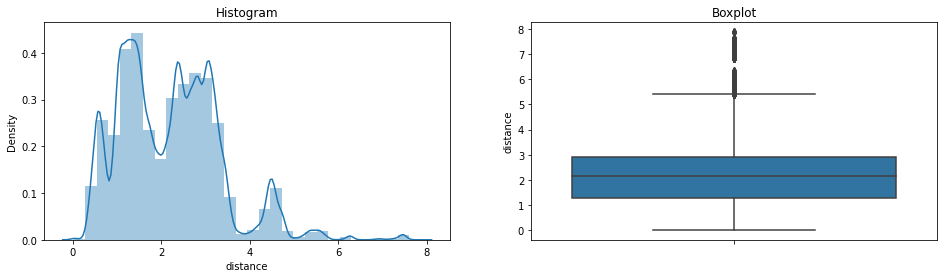

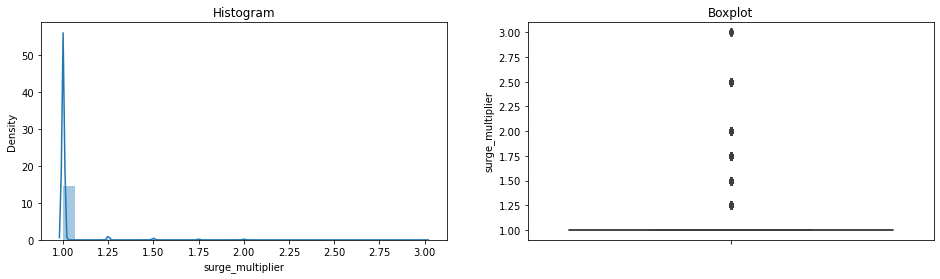

In [100]:
def diagnostic_plots(X_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(X_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(X_train, 'distance')
diagnostic_plots(X_train, 'surge_multiplier')

Diketahui bahwa parameter 'distance' dan 'surge_multiplier' memiliki outliers. Maka akan dilakukan pemanggilan fungsi untuk menghandle outliers.

In [101]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    dist_lower_boundary = X_train[variable].quantile(0.25) - (IQR * distance)
    dist_upper_boundary = X_train[variable].quantile(0.75) + (IQR * distance)

    return dist_upper_boundary, dist_lower_boundary

# Limits for `distance`
dist_upper_limit, dist_lower_limit = find_skewed_boundaries(X_train, 'distance', 1.5) # memberikan thershold/batasan sebesar 1.5 
dist_upper_limit, dist_lower_limit

# Limits for `surge_multiplier`
surge_upper_limit, surge_lower_limit = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
surge_upper_limit, surge_lower_limit

print('Dist_upper_limit : ', dist_upper_limit)
print('Dist_lower_limit : ', dist_lower_limit, '\n')
print('Surge_upper_limit : ', surge_upper_limit)
print('Surge_lower_limit : ', surge_lower_limit, '\n')

Dist_upper_limit :  5.42
Dist_lower_limit :  -1.2200000000000002 

Surge_upper_limit :  1.0
Surge_lower_limit :  1.0 



Berikut akan dilakukan flagging outliers pada parameter 'distance' dan 'surge_multiplier'.

In [102]:
# Flag the outliers in category `distance`
outliers_dist = np.where(X_train['distance'] > dist_upper_limit, True,
                       np.where(X_train['distance'] < dist_lower_limit, True, False))

# Flag the outliers in category `surge_multiplier`
outliers_surge = np.where(X_train['surge_multiplier'] > surge_upper_limit, True,
                       np.where(X_train['surge_multiplier'] < surge_lower_limit, True, False))

print(outliers_dist[:10])

[False False False False False False False False False False]


Berikut akan dilakukan trimming pada dataset dimana parameter 'distance' dan 'surge_multiplier' yang memiliki nilai outliers akan dihapus pada X_train & y_train.

In [103]:
X_train_trimmed = X_train.loc[~(outliers_dist + outliers_surge)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (510372, 7)
Size dataset - After trimming  :  (488208, 7)


In [104]:
y_train_trimmed = y_train.loc[~(outliers_dist + outliers_surge)]
y_train_trimmed

206355     7.5
369935    27.5
340205    16.0
239193    28.0
467144    25.0
          ... 
287775    38.5
516374     3.0
125680    16.5
491926     6.0
297103    10.5
Name: price, Length: 488208, dtype: float64

Berikut akan dilakukan pemeriksaan outliers pada dataset X_train, y_train sekaligus dataset yang sudah di-trim.

distance - Before Trimming


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



distance - After Trimming


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



surge_multiplier - Before Trimming


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



surge_multiplier - After Trimming


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


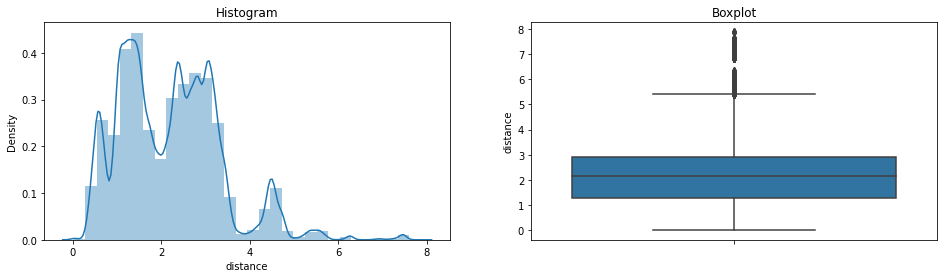

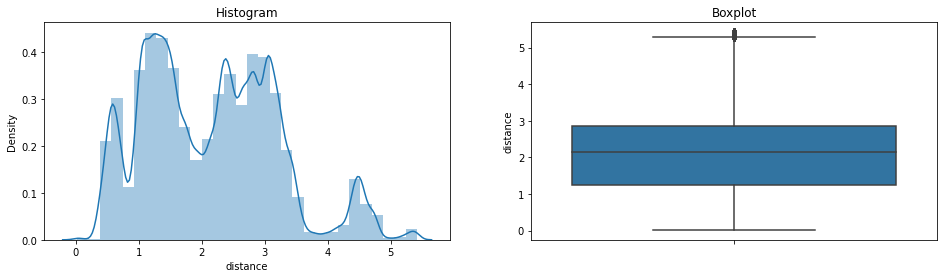

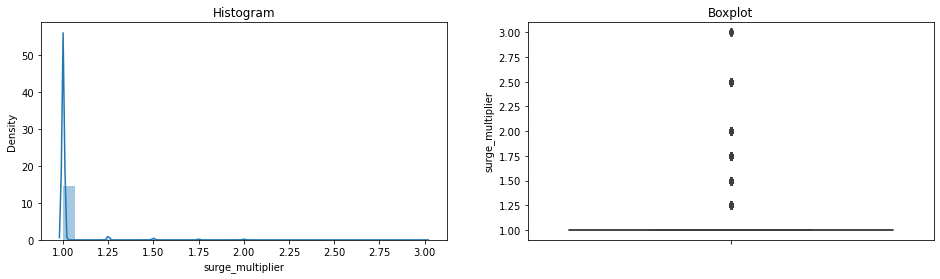

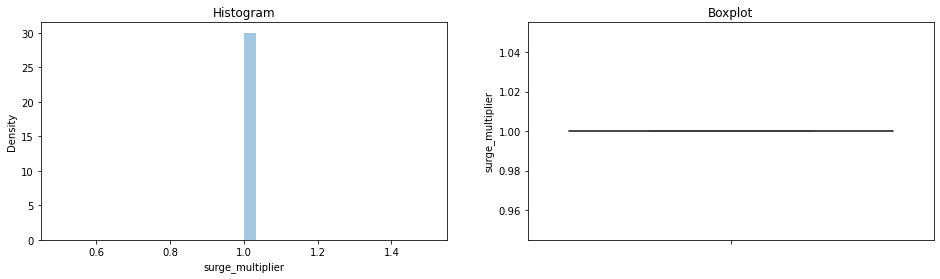

In [105]:
# Checking outliers in `distance` and `surge_mulplier`

print('distance - Before Trimming')
diagnostic_plots(X_train, 'distance')
print('\ndistance - After Trimming')
diagnostic_plots(X_train_trimmed, 'distance')

print('\nsurge_multiplier - Before Trimming')
diagnostic_plots(X_train, 'surge_multiplier')
print('\nsurge_multiplier - After Trimming')
diagnostic_plots(X_train_trimmed, 'surge_multiplier')

In [106]:
X_train_trimmed

,source,destination,name,distance,surge_multiplier,short_summary,weather
206355,Haymarket Square,Beacon Hill,UberPool,0.91,1.0,Overcast,cloudy
369935,Theatre District,Haymarket Square,Black SUV,1.61,1.0,Overcast,cloudy
340205,North Station,Haymarket Square,Black,0.56,1.0,Mostly Cloudy,partly-cloudy-night
239193,Theatre District,Northeastern University,Black SUV,1.80,1.0,Mostly Cloudy,partly-cloudy-night
467144,North End,Back Bay,Black,2.84,1.0,Partly Cloudy,partly-cloudy-day
...,...,...,...,...,...,...,...
287775,West End,Fenway,Lux Black XL,2.93,1.0,Rain,rain
516374,West End,Haymarket Square,Shared,0.71,1.0,Overcast,cloudy
125680,North End,Financial District,Lux Black,1.18,1.0,Mostly Cloudy,partly-cloudy-night
491926,Haymarket Square,West End,UberPool,0.62,1.0,Mostly Cloudy,partly-cloudy-night


### V.V. Handling Missing Values

Walaupun sebelumnya sudah dilakukan data cleaning, berikut akan dilakukan pemeriksaan kembali apakah ada missing values pada dataset yang telah di-split dan trimmed.

In [107]:
X_train_trimmed.isna().sum()

source              0
destination         0
name                0
distance            0
surge_multiplier    0
short_summary       0
weather             0
dtype: int64

In [108]:
y_train_trimmed.isna().sum()

0

In [109]:
X_test.isna().sum()

source              0
destination         0
name                0
distance            0
surge_multiplier    0
short_summary       0
weather             0
dtype: int64

In [110]:
y_test.isna().sum()

0

Diketahui bahwa tidak ada missing values pada dataset yang telah di-split dan trimmed.

### V.VI. Splitting Columns (Numerical Columns and Categorical Columns)

Berikut akan dilakukan split menjadi 2 dimana yang pertama adalah kolom numeric dan yang kedua adalah kolom categorical.

In [111]:
# Get Numerical and Categorical Columns

num_columns = X_train_trimmed.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_trimmed.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['distance', 'surge_multiplier']
Categorical Columns :  ['source', 'destination', 'name', 'short_summary', 'weather']


In [112]:
# Split on X_train

X_train_trimmed_num = X_train_trimmed[num_columns]
X_train_trimmed_cat = X_train_trimmed[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_trimmed_num

,distance,surge_multiplier
206355,0.91,1.0
369935,1.61,1.0
340205,0.56,1.0
239193,1.80,1.0
467144,2.84,1.0
...,...,...
287775,2.93,1.0
516374,0.71,1.0
125680,1.18,1.0
491926,0.62,1.0


In [113]:
X_train_trimmed_cat

,source,destination,name,short_summary,weather
206355,Haymarket Square,Beacon Hill,UberPool,Overcast,cloudy
369935,Theatre District,Haymarket Square,Black SUV,Overcast,cloudy
340205,North Station,Haymarket Square,Black,Mostly Cloudy,partly-cloudy-night
239193,Theatre District,Northeastern University,Black SUV,Mostly Cloudy,partly-cloudy-night
467144,North End,Back Bay,Black,Partly Cloudy,partly-cloudy-day
...,...,...,...,...,...
287775,West End,Fenway,Lux Black XL,Rain,rain
516374,West End,Haymarket Square,Shared,Overcast,cloudy
125680,North End,Financial District,Lux Black,Mostly Cloudy,partly-cloudy-night
491926,Haymarket Square,West End,UberPool,Mostly Cloudy,partly-cloudy-night


In [114]:
X_train_trimmed_num.describe()

,distance,surge_multiplier
count,488208.000000,488208.0
mean,2.139852,1.0
std,1.058007,0.0
min,0.020000,1.0
25%,1.260000,1.0
50%,2.140000,1.0
75%,2.870000,1.0
max,5.420000,1.0


Berikut akan menggunakan feature scaling pada X_train_trimmed_num & X_test_num.

In [115]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_trimmed_num_scaled = scaler.fit_transform(X_train_trimmed_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_trimmed_num_scaled

array([[0.16481481, 0.        ],
       [0.29444444, 0.        ],
       [0.1       , 0.        ],
       ...,
       [0.21481481, 0.        ],
       [0.11111111, 0.        ],
       [0.08148148, 0.        ]])

Berikut akan menggunakan Feature Encoding pada X_train_trimmed_cat & X_test_cat.

In [116]:
# Feature Encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_trimmed_cat_encoded = encoder.fit_transform(X_train_trimmed_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_trimmed_cat_encoded

array([[ 5.,  1.,  8.,  5.,  2.],
       [10.,  5.,  1.,  5.,  2.],
       [ 7.,  5.,  0.,  4.,  5.],
       ...,
       [ 6.,  4.,  3.,  4.,  5.],
       [ 5., 11.,  8.,  4.,  5.],
       [ 4.,  9.,  2.,  6.,  4.]])

In [117]:
X_train_trimmed_cat

,source,destination,name,short_summary,weather
206355,Haymarket Square,Beacon Hill,UberPool,Overcast,cloudy
369935,Theatre District,Haymarket Square,Black SUV,Overcast,cloudy
340205,North Station,Haymarket Square,Black,Mostly Cloudy,partly-cloudy-night
239193,Theatre District,Northeastern University,Black SUV,Mostly Cloudy,partly-cloudy-night
467144,North End,Back Bay,Black,Partly Cloudy,partly-cloudy-day
...,...,...,...,...,...
287775,West End,Fenway,Lux Black XL,Rain,rain
516374,West End,Haymarket Square,Shared,Overcast,cloudy
125680,North End,Financial District,Lux Black,Mostly Cloudy,partly-cloudy-night
491926,Haymarket Square,West End,UberPool,Mostly Cloudy,partly-cloudy-night


### V.VII. Concatenate between Numerical Columns and Categorical Columns

Berikut akan dilakukan concatenate pada X_train_trimmed_num, X_train_trimmed_cat_encoded, X_test_num_scaled, dan X_test_cat_encoded, sekaligus menampilkan X_train_final dalam bentuk dataframe.

In [118]:
# Concate Data

X_train_final = np.concatenate([X_train_trimmed_num_scaled, X_train_trimmed_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

# DataFrame Version

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,distance,surge_multiplier,source,destination,name,short_summary,weather
0,0.164815,0.0,5.0,1.0,8.0,5.0,2.0
1,0.294444,0.0,10.0,5.0,1.0,5.0,2.0
2,0.100000,0.0,7.0,5.0,0.0,4.0,5.0
3,0.329630,0.0,10.0,8.0,1.0,4.0,5.0
4,0.522222,0.0,6.0,0.0,0.0,6.0,4.0
...,...,...,...,...,...,...,...
488203,0.538889,0.0,11.0,3.0,4.0,8.0,6.0
488204,0.127778,0.0,11.0,5.0,7.0,5.0,2.0
488205,0.214815,0.0,6.0,4.0,3.0,4.0,5.0
488206,0.111111,0.0,5.0,11.0,8.0,4.0,5.0


# VI. Model Definition
> Pendefinisian Model yaitu menggunakan Linear Regression

In [119]:
# Model Definition

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

# VII. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [120]:
# Train

model_lin_reg.fit(X_train_final, y_train_trimmed)

LinearRegression()

# VIII. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [121]:
# Model Evaluation

## Predict Error on Train-Set and Test-Set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

## Evaluation of Errors
from sklearn.metrics import mean_squared_error, r2_score

print('Error Train-Set : ', mean_squared_error(y_train_trimmed, y_pred_train, squared=False))
print('R^2 score:', r2_score(y_train_trimmed, y_pred_train))
print('Error Test-Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('R^2 score:', r2_score(y_test, y_pred_test))

Error Train-Set :  6.324468928355084
R^2 score: 0.47991866702082275
Error Test-Set  :  6.854564395596439
R^2 score: 0.4597751110577618


Diketahui Error & R^2 score pada Train & Test set.

Berikut merupakan nilai pada intercepat dan coef.

In [122]:
# Display Rules

print('Intercept   : ', model_lin_reg.intercept_)
print('Coefficient : ', model_lin_reg.coef_)

Intercept   :  18.380305062607377
Coefficient :  [ 1.48706569e+01  1.18863253e-14  2.82798731e-02  1.49312763e-02
 -1.50975755e+00  4.41876523e-03  3.56363919e-03]


Berikut merupakan smeua parameter yang digunakan pada dataframe.

In [123]:
X_train_final_df.columns

MultiIndex([(        'distance',),
            ('surge_multiplier',),
            (          'source',),
            (     'destination',),
            (            'name',),
            (   'short_summary',),
            (         'weather',)],
           )

# IX. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set.

Berikut merupakan inference-set yang akan ditest.

In [124]:
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
1,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
2,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
3,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
4,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
5,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
6,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
7,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
8,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
9,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


Berikut parameter numerical dan categorical pada inference-set akan di-split. Diteruskan dengan melakukan feature scaling pada data_inf_num & feature encoding pada data_inf_cat. Dilanjutkan dengan concatenate pada data_inf_num, data_inf_cat_encoded, data_inf_num_scaled, dan data_inf_cat_encoded.

In [125]:
# Split Numerical and Categorical Columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

# Concatenation

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.27407407,  1.        ,  0.        ,  2.        ,  4.        ,
         6.        ,  5.        ],
       [ 0.20555556,  0.        ,  9.        , 10.        ,  4.        ,
         5.        ,  2.        ],
       [ 0.23703704,  0.        ,  9.        , 10.        ,  9.        ,
         3.        ,  6.        ],
       [ 0.28703704,  0.        , 10.        ,  6.        ,  8.        ,
         5.        ,  2.        ],
       [ 0.42407407,  0.        ,  1.        ,  2.        ,  7.        ,
         5.        ,  2.        ],
       [ 0.25925926,  0.        ,  6.        , 11.        ,  8.        ,
         4.        ,  4.        ],
       [ 0.45925926,  0.        ,  9.        ,  1.        ,  9.        ,
         5.        ,  2.        ],
       [ 0.22037037,  0.        ,  4.        ,  6.        ,  4.        ,
         6.        ,  4.        ],
       [ 0.64444444,  0.        ,  2.        ,  7.        ,  7.        ,
         8.        ,  6.        ],
       [ 0.21481481,  0.    

Berikut model inference akan di-predict dan akan ditampilkan dalam bentuk dataframe.

In [126]:
# Predict Model Inference

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Price Prediction'])
y_pred_inf

,Price Prediction
0,16.491130
1,15.831074
2,8.755853
3,10.972281
4,14.205626
5,10.523453
6,11.920645
7,15.861801
8,17.613125
9,14.433350


Berikut merupakan concatenate dari data inference-set dan y_pred inference-set.

In [127]:
# Concate to Original Inference-Set

pd.concat([data_inf, y_pred_inf], axis=1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price Prediction
0,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000,16.491130
1,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800,15.831074
2,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000,8.755853
3,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000,10.972281
4,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600,14.205626
5,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800,10.523453
6,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800,11.920645
7,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600,15.861801
8,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400,17.613125
9,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800,14.433350


# X. Pengambilan Kesimpulan

Menggunakan dataset 'rideshare_kaggle', telah dilakukan percobaan untuk prediksi nilai price berdasarkan parameter-parameter yang memiliki korelasi yang signifikan. Ditemukan ada 55095 missing values pada dataset dimana baris yang memiliki missing values tersebut sudah dihapus. Pada EDA, korelasi data dianalisa dan diketahui parameter yang memilki korelasi paling signifikan dengan parameter price. Grouping dilakukan pada price dan cab_type, dan diketahui total price yang di akumulasi pada cab_type Lyft = 5333957.98 dan Uber =5221435.00. Histogram telah ditampilkan untuk kolom price dan scatter plot untuk mengetahui distribusi antara 2 parameter yaitu Price & Distance.
</br>
Pada Preprocessing, dimulai dengan mendapatkan data untuk model inference, dilanjutkan dengan split dataset, dan feature selection. Atas Personal judgement : Diketahui bahwa beberapa parameter yang paling memengaruhi parameter price adalah </br>

1. distance
2. surge_multiplier 
3. name

Paramter 'hour', 'day', 'month', 'source', 'short_summary', 'weather' digunakan sebagai details, untuk memberikan konteks lebih lanjut. Dilanjutkan dengan handle outliers pada parameter 'distance' dan 'surge_multiplier' dan handle missing values pada dataset yang telah di-split dan trimmed. Proses preprosesing data dilakukan dengan melakukan encoding dan scaling pada data numeric dan categorical. Model yang digunakan merupakan regresi linear. Nilai Price ditetapkan sebagai variabel y, sedangkan nilai Distance, Surge Multiplier dan Name ditetapkan sebagai variabel X. Dari hasi model diketahui 
Error pada Train-Set :  6.324468928355084, dilanjutkan dengan R^2 score: 0.47991866702082275
</br> Melainkan Error pada Test-Set  :  6.854564395596439, dengan R^2 score: 0.4597751110577618.
</br>
Berikut merupakan nilai pada intercepat dan coef. 
</br>
Intercept   :  18.380305062607377
</br>
Coefficient :  [ 1.48706569e+01  1.18863253e-14  2.82798731e-02  1.49312763e-02
 -1.50975755e+00  4.41876523e-03  3.56363919e-03]
</br>
Ditutup dengan menemukan Price Prediction dengan menggunakan model yang sudah dibuat, dan dimasukan dalam data baru.